Name : Chathumini B.G.D.T.

Index Number : 190107T

Question 1

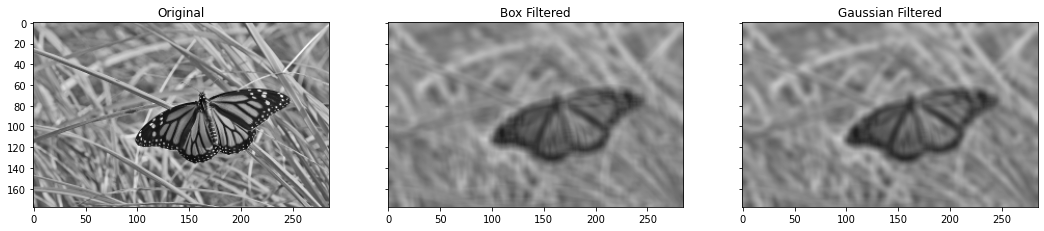

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

butterfly = cv.imread("butterfly.jpg",cv.IMREAD_REDUCED_GRAYSCALE_4)

#box filter
box_kernel = 1./81.*np.ones((9,9))
butterfly_b = cv.filter2D(butterfly,-1, box_kernel )

#gaussian filter
k_size = 9
sigma = 4
butterfly_g =cv.GaussianBlur(butterfly,(k_size,k_size),sigma)

fig, ax =plt.subplots(1,3, sharex ='all', sharey ='all', figsize=(18,6))
ax[0].imshow(butterfly,cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")

ax[1].imshow(butterfly_b,cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Box Filtered")

ax[2].imshow(butterfly_g ,cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Gaussian Filtered")
plt.show()